#  **Question 1 Clustering modeling**

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE as tsne
import seaborn as sns
import tensorflow as tf
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score

Importing the csv file

In [2]:
data = pd.read_csv('/content/covtype_train.csv')
data.head()


,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2


In [3]:
data.drop(data.tail(402598).index, inplace = True)
data.target = data.target - 1
true_labels= data['target']
data.drop(columns=['target'], inplace=True)
data.head()
data.shape

(4110, 10)

To get the numerical labels

In [4]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [5]:
data['Elevation']= label_encoder.fit_transform(data['Elevation']) 
data['Aspect']= label_encoder.fit_transform(data['Aspect']) 
data['Slope']= label_encoder.fit_transform(data['Slope']) 
data['Wilderness']= label_encoder.fit_transform(data['Wilderness']) 
data['Soil_Type']= label_encoder.fit_transform(data['Soil_Type']) 
data['Hillshade_9am']= label_encoder.fit_transform(data['Hillshade_9am']) 
data['Hillshade_Noon']= label_encoder.fit_transform(data['Hillshade_Noon']) 
data['Horizontal_Distance_To_Hydrology']= label_encoder.fit_transform(data['Horizontal_Distance_To_Hydrology']) 
data['Vertical_Distance_To_Hydrology']= label_encoder.fit_transform(data['Vertical_Distance_To_Hydrology']) 
data['Horizontal_Distance_To_Fire_Points']= label_encoder.fit_transform(data['Horizontal_Distance_To_Fire_Points'])

In [6]:
data.head(20)

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness
0,2,2,1,0,0,0,1,1,20,0
1,0,2,1,0,0,1,1,2,30,2
2,2,1,1,0,0,1,1,1,9,2
3,0,3,2,0,0,2,1,1,21,2
4,0,0,1,0,0,2,1,2,26,0
5,0,1,1,0,0,1,1,1,26,0
6,2,3,0,1,0,1,2,1,8,3
7,0,1,1,0,0,0,1,2,20,1
8,2,1,1,0,0,0,1,0,26,0
9,2,1,1,0,0,0,1,2,20,0


In [7]:
dt = np.array(data)
print(data.shape)
print(dt)

(4110, 10)
[[ 2  2  1 ...  1 20  0]
 [ 0  2  1 ...  2 30  2]
 [ 2  1  1 ...  1  9  2]
 ...
 [ 0  2  1 ...  2 26  0]
 [ 0  1  1 ...  1 28  2]
 [ 0  0  0 ...  1 30  2]]


In [8]:
data[:]

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness
0,2,2,1,0,0,0,1,1,20,0
1,0,2,1,0,0,1,1,2,30,2
2,2,1,1,0,0,1,1,1,9,2
3,0,3,2,0,0,2,1,1,21,2
4,0,0,1,0,0,2,1,2,26,0
...,...,...,...,...,...,...,...,...,...,...
4105,0,2,1,0,0,1,1,1,19,0
4106,0,2,2,0,0,1,2,1,30,2
4107,0,2,1,0,0,0,1,2,26,0
4108,0,1,1,0,0,1,1,1,28,2


In [9]:
data = tsne(n_components=2).fit_transform(dt)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [10]:
data

array([[-62.350174,  12.679019],
       [ 35.92208 , -16.434448],
       [-59.49715 , -30.232405],
       ...,
       [ 33.87341 ,  57.536446],
       [ 15.631023, -13.376208],
       [ 25.418116, -11.235606]], dtype=float32)



```
# This is formatted as code
```

## **K-mean Clustering**

In [11]:
kmeans = KMeans(n_clusters=7,max_iter=60,random_state=100).fit(data)
kmean_labels = kmeans.labels_
print(kmean_labels)

[2 3 6 ... 1 3 3]


Finding the centroids

In [12]:
kmean_centroids = kmeans.cluster_centers_
print(kmean_centroids)

[[ 44.422707  -55.098312 ]
 [ 25.848034   42.008358 ]
 [-30.710293   13.162608 ]
 [ 34.96582   -10.406835 ]
 [-26.075895   65.08647  ]
 [ -4.5871906 -65.14395  ]
 [-49.996567  -29.148289 ]]


Visualization of the clusters

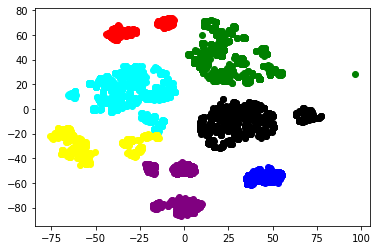

In [13]:
#https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

frame = pd.DataFrame(data)
frame['cluster'] = kmean_labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black','red','purple','yellow']
for k in range(0,7):
    reduced_data = frame[frame["cluster"]==k]
    plt.scatter(reduced_data["Weight"],reduced_data["Height"],c=color[k])
plt.show()

In [14]:
label_list = list(np.unique(kmean_labels))
PtsInCluster = []
for val in label_list:
  PtsInCluster.append(list(kmean_labels).count(val))
print(PtsInCluster)

[228, 810, 942, 880, 273, 480, 497]


Comparison between cluster distribution and true label count.

In [15]:
adjusted_mutual_info_score(true_labels, kmean_labels)

0.20695032105105654

## **DBSCAN Clustering**

In [18]:
dbscan = DBSCAN(eps=16, min_samples=4).fit(data)
dbscan_labels = dbscan.labels_


Finding the centroids

In [19]:
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()
X=dbscan.fit_predict(data)
clf.fit(data,X)
print((clf.centroids_))

[[ 96.48691559  28.79241562]
 [-26.3081665   -2.28263259]
 [ 30.55674744  14.70688438]
 [-62.83457947 -29.41551208]
 [ 44.42271423 -55.09828949]
 [-26.07589912  65.08648682]
 [ -2.65670276 -78.65802002]]


Visualization of the clusters

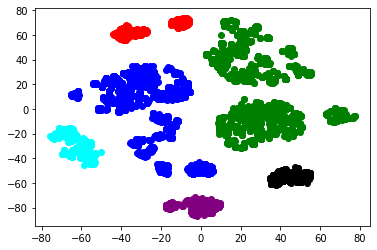

In [20]:
#https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
frame = pd.DataFrame(data)
frame['cluster'] = dbscan_labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black','red','purple','yellow']
for k in range(0,7):
    reduced_data = frame[frame["cluster"]==k]
    plt.scatter(reduced_data["Weight"],reduced_data["Height"],c=color[k])
plt.show()

In [21]:
label_list = list(np.unique(dbscan_labels))
PtsInCluster = []
for val in label_list:
  PtsInCluster.append(list(dbscan_labels).count(val))
print(PtsInCluster)

[1, 1332, 1689, 322, 228, 273, 265]


Comparison between cluster distribution and true label count.

In [22]:
adjusted_mutual_info_score(true_labels, dbscan_labels)

0.249497909492075

## **Aglomerative Clustering**

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
Agmc = AgglomerativeClustering(n_clusters=7).fit(data)
Agmc_labels = Agmc.labels_


Finding the centroids

In [25]:
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()
X=Agmc.fit_predict(data)
clf.fit(data,X)
print(clf.centroids_)

[[-43.85418701 -25.51428604]
 [ 35.03565216 -10.36235142]
 [-32.56026459  16.40764809]
 [ 25.76071358  42.02465057]
 [ -4.5871892  -65.14392853]
 [-26.07589912  65.08648682]
 [ 44.42271423 -55.09828949]]


Visualization of the clusters

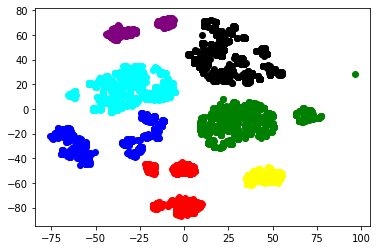

In [26]:
#https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
frame = pd.DataFrame(data)
frame['cluster'] = Agmc_labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black','red','purple','yellow']
for k in range(0,7):
    reduced_data = frame[frame["cluster"]==k]
    plt.scatter(reduced_data["Weight"],reduced_data["Height"],c=color[k])
plt.show()


In [27]:
label_list = list(np.unique(Agmc_labels))
PtsInCluster = []
for val in label_list:
  PtsInCluster.append(list(Agmc_labels).count(val))
print(PtsInCluster)

[613, 881, 826, 809, 480, 273, 228]


Comparison between cluster distribution and true label count.

In [28]:
adjusted_mutual_info_score(true_labels, Agmc_labels)

0.19771953065422737

## **Gaussian Clustering**

In [29]:
from sklearn.mixture import GaussianMixture
gsm = GaussianMixture(n_components=7)
gsm.fit(data)
gsm_labels = gsm.predict(data)

Finding the centroids

In [30]:
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()
X=gsm.fit_predict(data)
clf.fit(data,X)
print(clf.centroids_)

[[ 30.95767021 -10.87226009]
 [-52.02759933 -29.6005249 ]
 [-26.07589912  65.08648682]
 [ -4.5871892  -65.14392853]
 [ 25.76071358  42.02465057]
 [-31.63546562  14.62796116]
 [ 44.42271423 -55.09828949]]


Visualization of the clusters

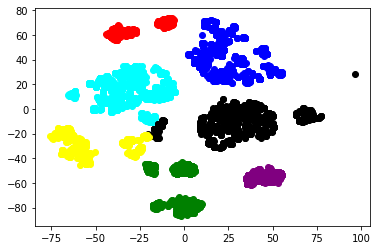

In [31]:
#https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
frame = pd.DataFrame(data)
frame['cluster'] = gsm_labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black','red','purple','yellow']
for k in range(0,7):
    reduced_data = frame[frame["cluster"]==k]
    plt.scatter(reduced_data["Weight"],reduced_data["Height"],c=color[k])
plt.show()

In [32]:
label_list = list(np.unique(gsm_labels))
PtsInCluster = []
for val in label_list:
  PtsInCluster.append(list(gsm_labels).count(val))
print(PtsInCluster)

[809, 480, 893, 959, 273, 228, 468]


Comparison between cluster distribution and true label count.

In [33]:
adjusted_mutual_info_score(true_labels, gsm_labels)

0.20659891978754266

# **Comaring Each mode with Gaussian Bases clustering model**

In [34]:
adjusted_mutual_info_score(gsm_labels, kmean_labels)

0.9573707747452824

In [35]:
adjusted_mutual_info_score(gsm_labels, dbscan_labels)

0.7499824814017508

In [36]:
adjusted_mutual_info_score(gsm_labels, Agmc_labels)

0.937406523359616